## Importa as bibliotecas Numpy e Pandas, e o data frame.

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
pd.options.plotting.backend = "plotly"


# Selecionando apenas as colunas de interesse
columns = ['MUNICIPIO_CIRCUNSCRICAO', 'DATA_FATO', 'HORA_FATO', 'DESC_TIPOLOCAL', 'SEXO_PESSOA', 'IDADE_PESSOA', 'COR_PELE', 'Nº DE VIT EM LATRO'] 
df = pd.read_excel('Latrocinio_2018_2022.xlsx', usecols=columns)
df.head()

,MUNICIPIO_CIRCUNSCRICAO,Nº DE VIT EM LATRO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,SEXO_PESSOA,IDADE_PESSOA,COR_PELE
0,São Paulo,1,2018-01-21,00:02:00,Via pública,Masculino,59.0,Branca
1,São Paulo,1,2018-01-19,23:30:00,Via pública,Masculino,27.0,Branca
2,São Paulo,1,2018-01-10,21:00:00,Via pública,Masculino,59.0,Branca
3,São Paulo,1,2018-01-14,04:33:00,Via pública,Masculino,30.0,Parda
4,São Paulo,1,2018-01-30,13:20:00,Via pública,Masculino,68.0,Parda


## Padronizando strings
#### - lower case, removendo acentos, removendo espaços no final

In [151]:
# Importando biblioteca unidecode
from unidecode import unidecode

# Unidecode(): biblioteca que subtitui caracteres com acentos por sua caractere sem acento equivalente
# str.lower(): tranforma toda a string em lower case
# str.strip(): remove espaços que possam haver no final de uma string
df = df.applymap(lambda x: unidecode(x.lower().strip()) if type(x) == str else x)
df.head()

,MUNICIPIO_CIRCUNSCRICAO,Nº DE VIT EM LATRO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,SEXO_PESSOA,IDADE_PESSOA,COR_PELE
0,sao paulo,1,2018-01-21,00:02:00,via publica,masculino,59.0,branca
1,sao paulo,1,2018-01-19,23:30:00,via publica,masculino,27.0,branca
2,sao paulo,1,2018-01-10,21:00:00,via publica,masculino,59.0,branca
3,sao paulo,1,2018-01-14,04:33:00,via publica,masculino,30.0,parda
4,sao paulo,1,2018-01-30,13:20:00,via publica,masculino,68.0,parda


### Selecionando apenas as ocorrências na cidade de São Paulo

In [152]:
df = df[df['MUNICIPIO_CIRCUNSCRICAO'] == 'sao paulo']

### Excluindo linhas que contenham algum dado NaN

In [153]:
df.dropna(axis=0)

,MUNICIPIO_CIRCUNSCRICAO,Nº DE VIT EM LATRO,DATA_FATO,HORA_FATO,DESC_TIPOLOCAL,SEXO_PESSOA,IDADE_PESSOA,COR_PELE
0,sao paulo,1,2018-01-21,00:02:00,via publica,masculino,59.0,branca
1,sao paulo,1,2018-01-19,23:30:00,via publica,masculino,27.0,branca
2,sao paulo,1,2018-01-10,21:00:00,via publica,masculino,59.0,branca
3,sao paulo,1,2018-01-14,04:33:00,via publica,masculino,30.0,parda
4,sao paulo,1,2018-01-30,13:20:00,via publica,masculino,68.0,parda
...,...,...,...,...,...,...,...,...
239,sao paulo,1,2018-11-11,19:30:00,via publica,masculino,32.0,branca
258,sao paulo,1,2018-12-29,23:50:00,terminal/estacao,feminino,27.0,amarela
259,sao paulo,1,2018-12-03,00:28:00,saude,masculino,56.0,branca
260,sao paulo,1,2018-12-16,04:30:00,via publica,masculino,32.0,branca


### Alterando o tipo da coluna 'IDADE_PESSOA' de float para int

In [154]:
df['IDADE_PESSOA'] = df['IDADE_PESSOA'].fillna(0.0).astype(int)

### Excluindo linhas que tenham idade de pessoas como 0 (são valores nulos)

In [155]:
df = df.loc[df['IDADE_PESSOA'] > 0]

### Padronizando a coluna 'HORA_FATO' e deixando somente as linhas com o formato no tipo datatime.time

In [156]:
df = df[[not isinstance(x, str) for x in df['HORA_FATO']]]

# Plotando Gráficos

### Agrupando ocorrências de latrocinios por mês

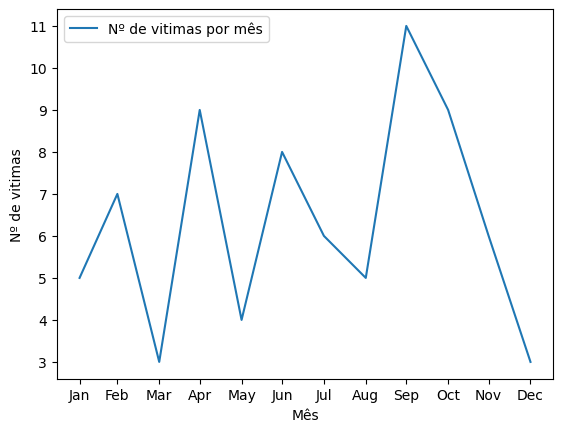

In [157]:
df_V_M = df[['Nº DE VIT EM LATRO', 'DATA_FATO']].groupby(pd.Grouper(key='DATA_FATO', freq='M')).sum()
date = pd.to_datetime(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30','2018-05-31', '2018-06-30', '2018-07-31',
                       '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'])

fig, ax = plt.subplots()
plt.plot(df_V_M, label='Nº de vitimas por mês')

# configurar o eixo x para mostrar os meses do ano
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.legend()
plt.ylabel('Nº de vitimas')
plt.xlabel('Mês')
plt.xticks(date)

plt.show()

### Agrupando por sexo

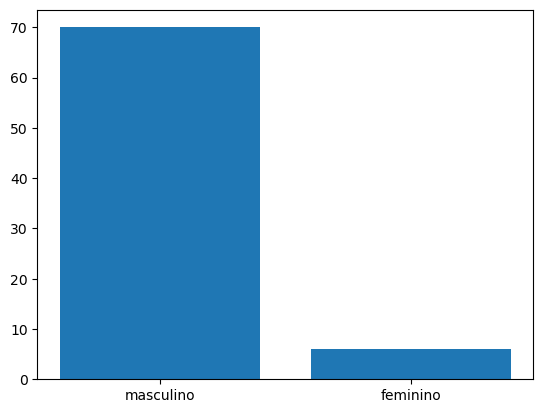

In [158]:
counts = df['SEXO_PESSOA'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

### Agrupando por cor de pele

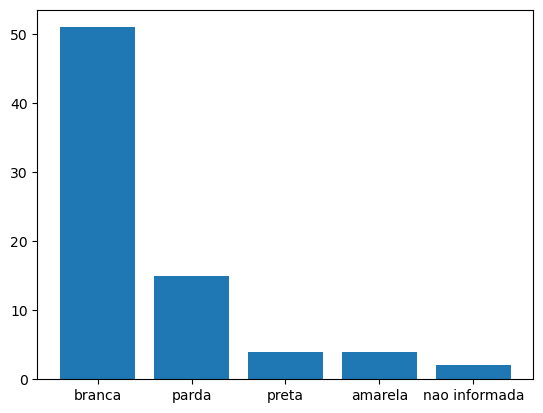

In [159]:
counts = df['COR_PELE'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

### Agrupando por tipo de local da ocorrência

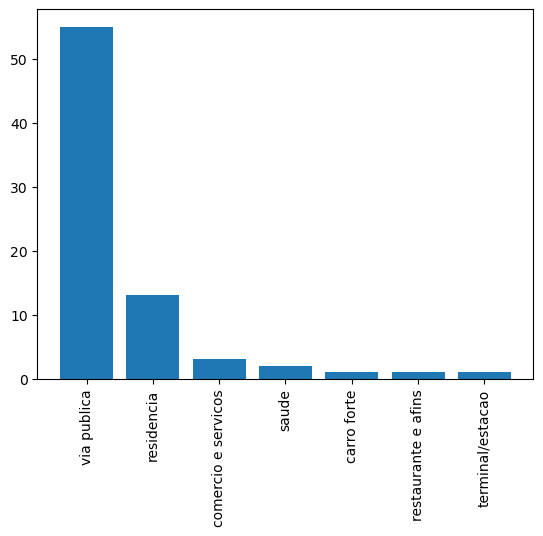

In [160]:
counts = df['DESC_TIPOLOCAL'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.show()

In [162]:
#df.to_excel('teste.xlsx', sheet_name='Teste', header=True, index=False)